In [ ]:
!pip install pandas
!pip install matplotlib
#python 3.11.9 was the python kernel used


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\gharr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\gharr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

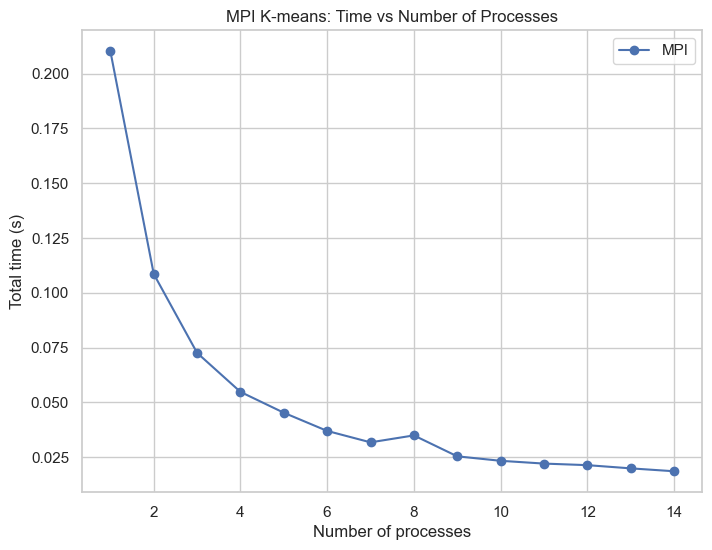

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

mpi_csv = "kmeans_speedup1.0.csv" 
df_mpi = pd.read_csv(mpi_csv)

plt.figure(figsize=(8,6))
plt.plot(df_mpi['procs'], df_mpi['time'], marker='o', label='MPI')
plt.xlabel('Number of processes')
plt.ylabel('Total time (s)')
plt.title('MPI K-means: Time vs Number of Processes')
plt.grid(True)
plt.legend()
plt.savefig("mpi_speedup.png", dpi=300)
plt.show()


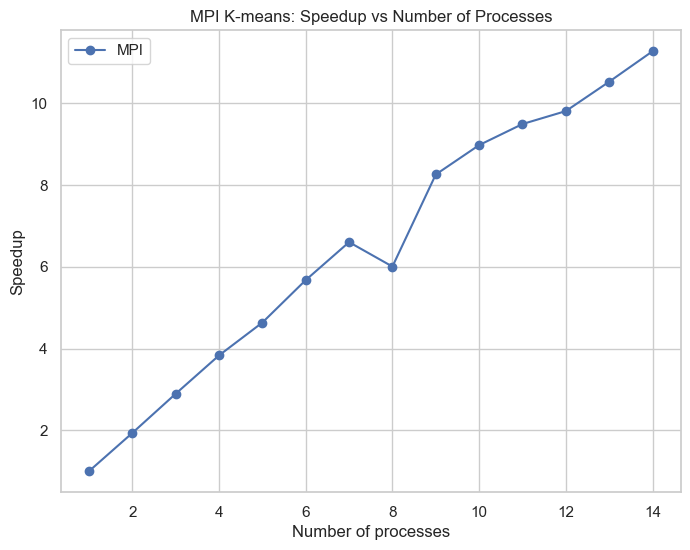

In [ ]:
df_mpi['speedup'] = df_mpi['time'].iloc[0] / df_mpi['time']
plt.figure(figsize=(8,6))
plt.plot(df_mpi['procs'], df_mpi['speedup'], marker='o', label='MPI')
plt.xlabel('Number of processes')
plt.ylabel('Speedup')
plt.title('MPI K-means: Speedup vs Number of Processes')
plt.grid(True)
plt.legend()
plt.savefig("mpi_speedup.png", dpi=300)
plt.show()


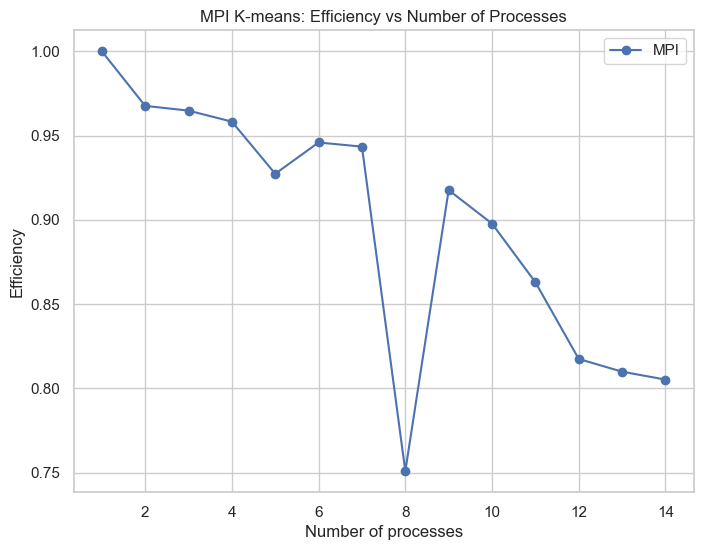

In [17]:
df_mpi["Efficiency"] = df_mpi["speedup"] / df_mpi["procs"]

plt.figure(figsize=(8,6))
plt.plot(df_mpi['procs'], df_mpi['Efficiency'], marker='o', label='MPI')
plt.xlabel('Number of processes')
plt.ylabel('Efficiency')
plt.title('MPI K-means: Efficiency vs Number of Processes')
plt.grid(True)
plt.legend()
plt.savefig("mpi_efficiency.png", dpi=300)
plt.show()

In [18]:
df_mpi.to_csv("kmeans_speedup_processed.csv", index=False)

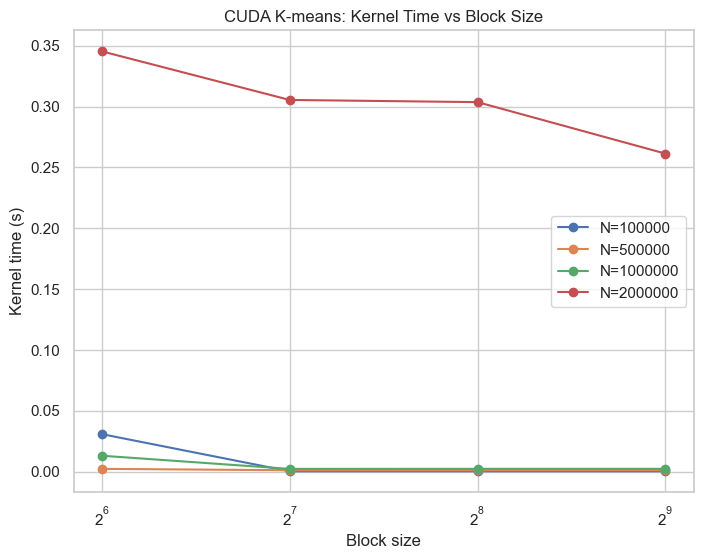

In [19]:
# CUDA CSV
cuda_csv = "kmeans_cuda_sweep.csv"  # your CUDA sweep output
df_cuda = pd.read_csv(cuda_csv)

import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(8,6))
for N in df_cuda['N'].unique():
    subset = df_cuda[df_cuda['N']==N]
    plt.plot(subset['block_size'], subset['kernel_time_s'], marker='o', label=f'N={N}')


plt.xlabel('Block size')
plt.ylabel('Kernel time (s)')
plt.title('CUDA K-means: Kernel Time vs Block Size')
plt.xscale('log', base=2)
plt.grid(True)
plt.legend()
plt.savefig("cuda_blocksize.png", dpi=300)
plt.show()


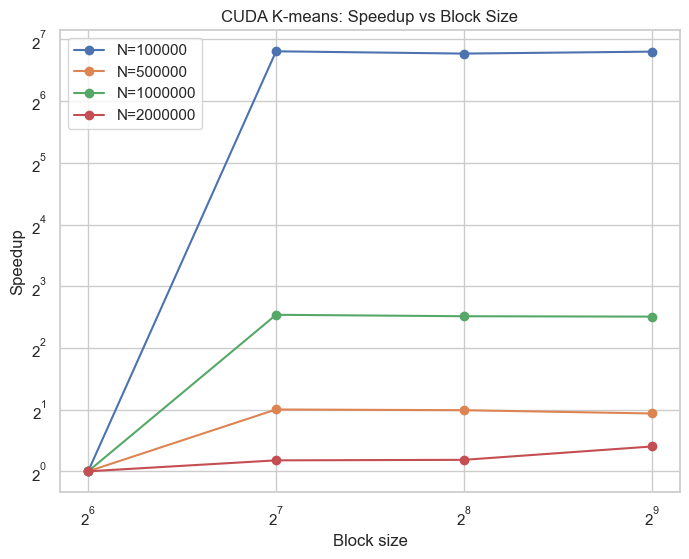

In [20]:
df_cuda['speedup'] = df_cuda.groupby('N')['kernel_time_s'].transform(lambda x: x.iloc[0]/x)

plt.figure(figsize=(8,6))
for N in df_cuda['N'].unique():
    subset = df_cuda[df_cuda['N']==N]
    plt.plot(subset['block_size'], subset['speedup'], marker='o', label=f'N={N}')


plt.xlabel('Block size')
plt.yscale('log', base=2)
plt.ylabel('Speedup')
plt.title('CUDA K-means: Speedup vs Block Size')
plt.xscale('log', base=2)
plt.grid(True)
plt.legend()
plt.savefig("cuda_blocksize.png", dpi=300)
plt.show()